# On Bayesian Search for the Feasible Space Under Computationally Expensive Constraints

[Alma Rahat](https://www.swansea.ac.uk/staff/science/computer-science/alma-rahat/) and [Micahel Wood](http://www.actacoustics.co.uk/about.html)
***

This repostiory contains Python code for the Bayesian search strategies discussed in a paper published in the Sixth [International Conference on Machine Learning, Optimization, and Data Science](https://lod2020.icas.xyz/). 

The preprint can be found in: https://arxiv.org/abs/2004.11055

***

## Pre-requisits.

The code here is a __Python3__ implementation of some infill strategies for optimisation and boundary exploration of constraints. The following modules are necessary to run the code here. 

* [DEAP](https://github.com/DEAP/deap)
* [Numpy](http://www.numpy.org/)
* [SciPy](https://www.scipy.org/)
* [matplotlib](https://matplotlib.org/2.0.0/index.html)
* [PyDOE](https://pythonhosted.org/pyDOE/)
* [evoalgos](https://ls11-www.cs.tu-dortmund.de/people/swessing/evoalgos/doc/)
* [GPy](https://github.com/SheffieldML/GPy)
* [CMA](https://www.lri.fr/~hansen/html-pythoncma/frames.html)

To install any of these modules, just issue the following command in your terminal. 

`$ pip install module_name`

To install a module from github, use appropriate command. For instance:

`$ pip install git+https://github.com/DEAP/deap`

In addition to these, we used a custom module written in _C_ for dominance comparison. The code is given in the repository. To install the module, use the following command wihtin the _FrontCalc_ directory.

`$ python setup.py install`

> __Note.__ As Python installations differ quite significantly, there may be other dependencies, but these should be standard modules from PyPi. If running the code results in complaints that something could not be imported, then please install the relevant module using _pip_.

## Setting up.

The boundary expplorer requires a _settings_ dictionary along with the multi-objective function and associated arguments or keyword arguments. We list the the most pertinent settings below. 

* n_dim (int): the number of dimensions in the parameter space.
* n_obj (int): the number of constraint functions.
* lb (list or numpy array): an array of lower bounds in parameter space (1 in each dimension).
* ub (list or numpy array): an array of upper bounds in parameter space (1 in each dimension).
* ref_vector (list or numpy array): the threshold vector. 
* method_name (str): the method to use for performing constraint boundary exploration (deafaults to 'MBEPBE'). Options are:
    - 'MBEPBE' : This is the proposed novel acquisition function. 
    - 'MBEBichon'
    - 'MBERanjan'
    - 'MBETMSE'
    - 'MBEEchard'
    - 'MBEKnudde'
* budget (int): the budget on the number of function evaluations.
* n_samples (int): the number of initial samples.
* 
* kern_name (str): the kernel function to be used with Gaussian Processes. Defaults to __'Matern52'__. Please refer to GPy documentation for other options. 
* maxfevals (int): the maximum number of function evaluations for infill criterion optimisation using CMA-ES. Defaults to $5000d$, where $d$ is the number of dimensions in parameter space.  
* cma_options (dict): dictionary of settings for Hansen's CMA-ES code. See [CMA-ES documentation](https://www.lri.fr/~hansen/html-pythoncma/frames.html) for more details on avaialble options.
* cma_sigma (float): the extent of the standard deviation for CMA-ES. See [CMA-ES documentation](https://www.lri.fr/~hansen/html-pythoncma/frames.html) for details. 
* validation_samples (int): number of Monte Carlo validation samples to use to track progress. 
* validation_seed (int): Specify a seed to ensure that the same validation samples are used. 
* lhs_seed (int): Specify a seed to ensrue that the same set of LHS samples are used. 

> __Notes__<br />
> * For one-dimensional search space and a single objective problem, we just use a grid-search instead of CMA-ES. 




## Running the search.

To run the search process it is sufficient to define a constraint function that may produce a mutiple responses given a decision vector, and use appropriate settings to call the search method (_IscaOpt.Optimiser.EMO_). Here we give an example of using the search code. 

### An example.

Below we show an example problem: G24, and plot the feasible space and the saples located during Bayesian search. 

In [1]:
from IPython.display import clear_output
# example set up
import numpy as np
# import optimiser codes
import IscaOpt
import matplotlib.pyplot as plt
plt.ion()

from functions import G_problems # import G problems


fun = G_problems().G24 # G24 function
lb = G_problems().p24.get_lb() # lower bound of the decision space
ub = G_problems().p24.get_ub() # upper bound of the decision space
threshold = [0]*(G_problems().p24.get_nf()-1) # threshold for feasibility

n_samples = 2
budget = 20 + 2 # 11d
settings = {\
    'n_dim': 2,\
    'n_obj': 2,\
    'lb': lb,\
    'ub': ub,\
    'ref_vector': threshold,\
    'method_name': 'MBEPBE',\
    'budget':budget,\
    'validation_seed':145687,\
    'n_samples':n_samples}


# optimise
X, Y, confusion_matrices, mop = IscaOpt.Optimiser.EMO(fun, settings=settings)
models = mop.models
clear_output()

In [2]:
# Measuring performance
informedness = IscaOpt.support.informedness
F1 = IscaOpt.support.F1
print("Informedness: ", informedness(np.array(confusion_matrices)))
print("F1 score: ", F1(np.array(confusion_matrices)))

Informedness:  [0.05517493 0.02059589 0.41273383 0.30361605 0.36344247 0.40519349
 0.6315161  0.7725644  0.90231392 0.94336829 0.97170211 0.99346444
 0.99399313 0.99510746 0.99640318 0.9970303  0.99725316 0.99725316
 0.99828454 0.99828454 0.99846593]
F1 score:  [0.62276851 0.61125693 0.64825508 0.62911796 0.64817714 0.7233603
 0.81085747 0.87247013 0.94718871 0.96840705 0.98439938 0.99654056
 0.99676592 0.99732501 0.99799465 0.99832906 0.99844063 0.99844063
 0.99899766 0.99899766 0.99910893]


Below we show the landscapes for the two constraint functions $g_1(\mathbb{x})$ and $g_2(\mathbb{x})$ for the G24 test problem. 

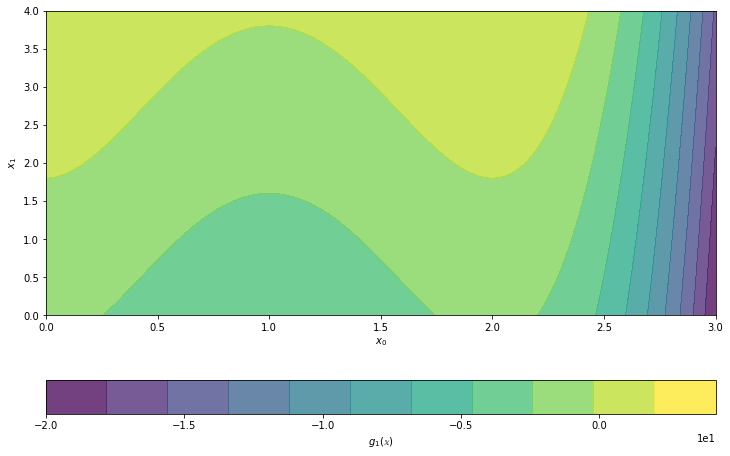

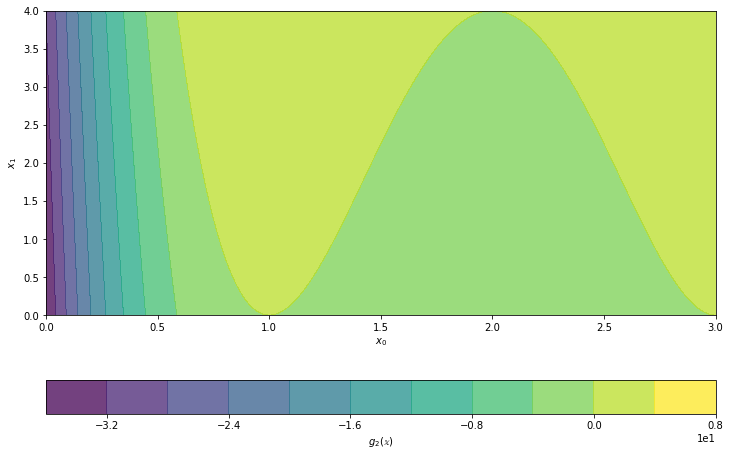

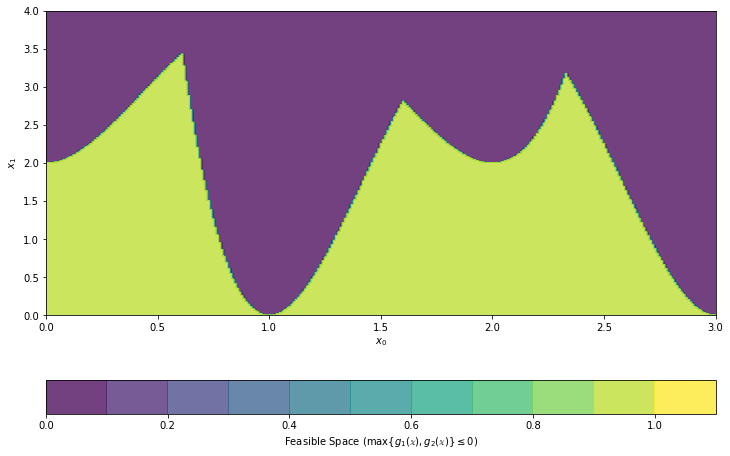

In [3]:
# plot true constraint functions
plot = IscaOpt.support.plot_contour_2D
def fun_1(x):
    response = fun(x)
    return response[0]
def fun_2(x):
    response = fun(x)
    return response[1]
def feasibility(x):
    response = fun(x)
    return np.max(response - threshold)<=0
# function 1
plt.figure(figsize=(12,8))
plot(fun_1, lb, ub, ctitle="$g_1(\\mathbb{x})$")
# function 2
plt.figure(figsize=(12,8))
plot(fun_2, lb, ub, ctitle="$g_2(\\mathbb{x})$")
# feasible space
plt.figure(figsize=(12,8))
plot(feasibility, lb, ub, 
     ctitle="Feasible Space $(\\max \{g_1(\\mathbb{x}),g_2(\\mathbb{x})\} \leq 0)$")

The bottom figure above shows the combiend feasible space determined by $(\max \{g_1(\mathbb{x}),g_2(\mathbb{x})\} \leq 0)$. Below we show the true feasible space and superimpose the samples taken throughout the search. Here, 0 represents infeasible and 1 represents feasible part of the space. 

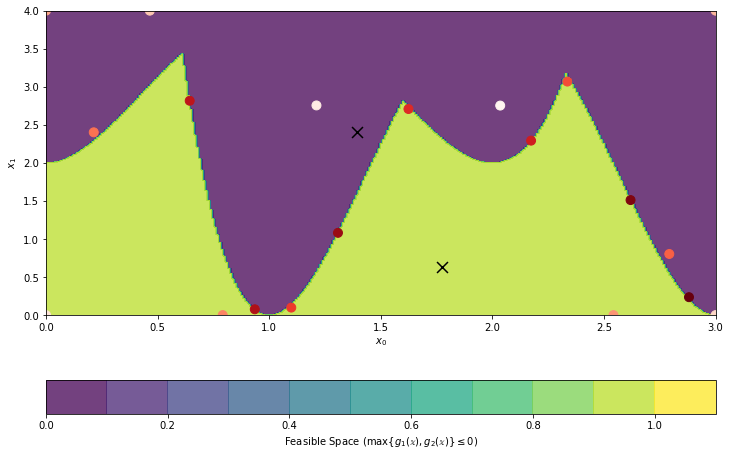

In [4]:
# plot samples on true feasible space
plt.figure(figsize=(12,8))
plot(feasibility, lb, ub, ctitle="Feasible Space $(\\max \{g_1(\\mathbb{x}),g_2(\\mathbb{x})\} \leq 0)$")
# plot initial samples in black crosses
plt.scatter(X[:n_samples][:,0],X[:n_samples][:,1], marker="x", s=120, color= "black")
# plot samples -- darker colours show later samples
plt.scatter(X[n_samples:][:,0],X[n_samples:][:,1], marker="o", s=80,\
            cmap='Reds', c=np.arange(budget-n_samples),)

Below we show the probabilistic estimation of the feasible space from the trained models and also superimpose the samples taken during the search such that it is comparable with the figure above. Clearly our proposed acquisition function located areas around the boundary, especially duraing the latter part of the search. 

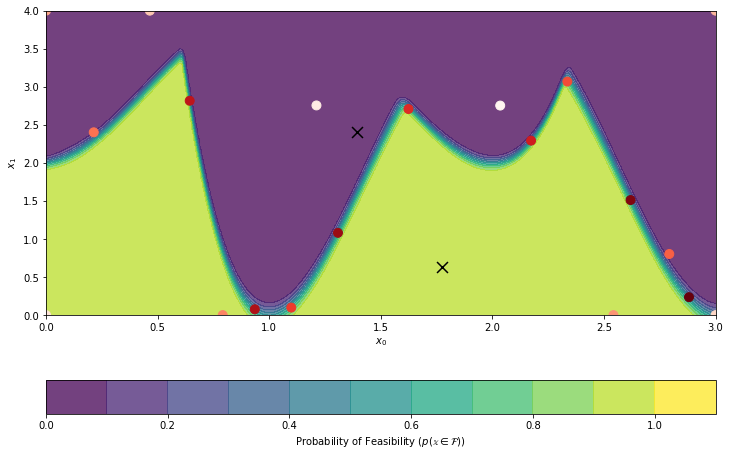

In [5]:
# plot predicted feasible space with samples
plt.figure(figsize=(12,8))
plot(models.prob_feasibility, lb, ub, args=(threshold, lb, ub), 
     ctitle="Probability of Feasibility $(p(\mathbb{x}\in\\mathcal{F}))$")
# plot initial samples in black crosses
plt.scatter(X[:n_samples][:,0],X[:n_samples][:,1], marker="x", s=120, color= "black")
# plot samples -- darker colours show later samples
plt.scatter(X[n_samples:][:,0],X[n_samples:][:,1], marker="o", s=80,\
            cmap='Reds', c=np.arange(budget-n_samples),)

## Known issues

## Errata

## Contact

For any comments, queries or suggestions, please send an email to: [Alma Rahat](mailto:a.a.m.rahat@swansea.ac.uk)